# Loading Data

In [87]:
from pyemma.coordinates import tica
from msmbuilder.example_datasets import AlanineDipeptide
import matplotlib.pyplot as plt
from matplotlib import cm


trajs = AlanineDipeptide().get().trajectories
import numpy as np

from msmbuilder.featurizer import AtomPairsFeaturizer
pairs = []
for i in range(22):
    for j in range(i):
        pairs.append((j,i))
X = AtomPairsFeaturizer(pairs).fit_transform(trajs)

from msmbuilder.featurizer import DihedralFeaturizer
Y = DihedralFeaturizer().fit_transform(trajs)
Y_di = np.array(DihedralFeaturizer(sincos=False).fit_transform(trajs))

alanine_dipeptide already is cached


# Performing tICA

In [88]:
obj_x = tica(np.vstack(X), lag = 1, dim = 2).get_output()[0]
obj_x = np.array(obj_x)

In [89]:
print(len(Y_di), len(Y_di[0]), len(Y_di[0][0]))
print (len(Y_di[0]))

10 9999 2
9999


# Graphing it

0 9999
_______________________________________________________


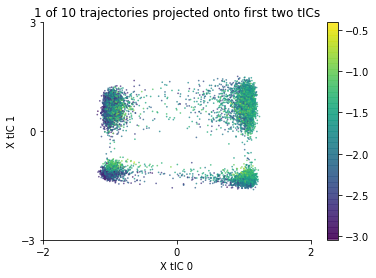

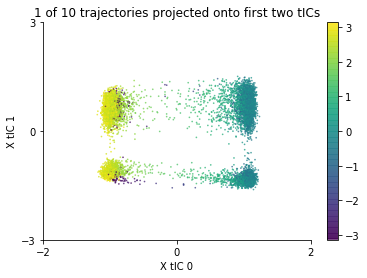

9999 19999
_______________________________________________________


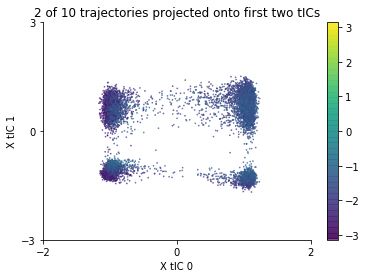

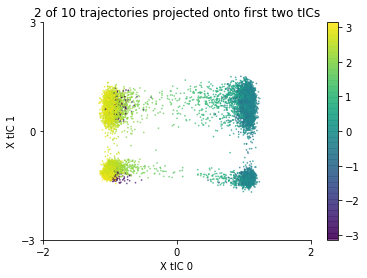

19999 29999
_______________________________________________________


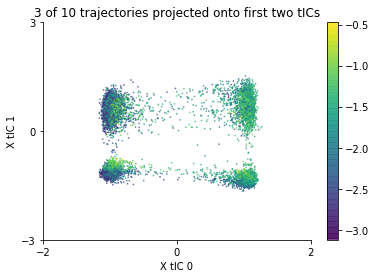

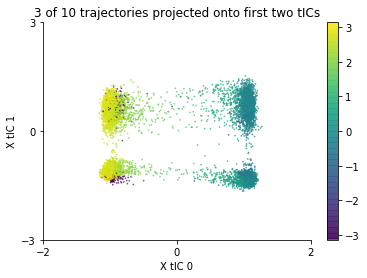

29999 39999
_______________________________________________________


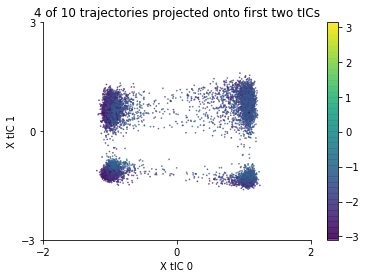

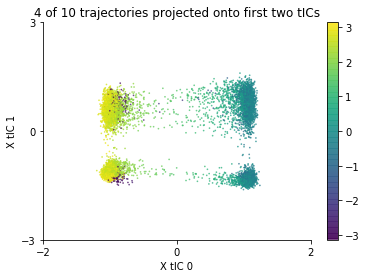

39999 49999
_______________________________________________________


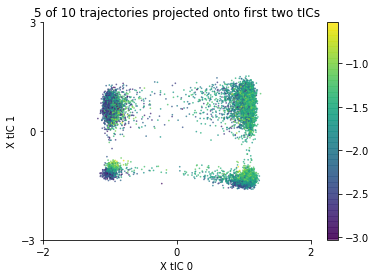

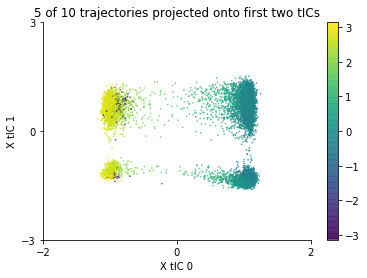

49999 59999
_______________________________________________________


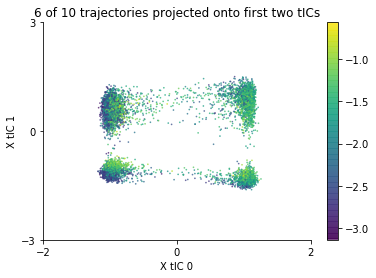

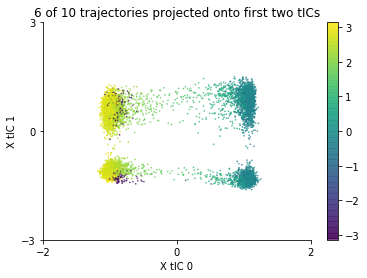

59999 69999
_______________________________________________________


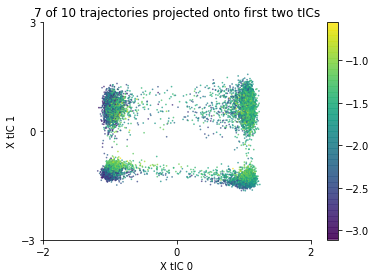

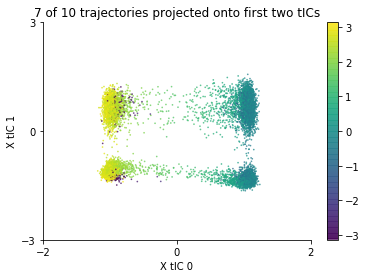

69999 79999
_______________________________________________________


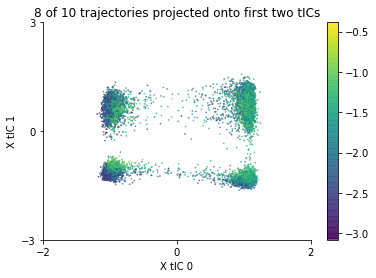

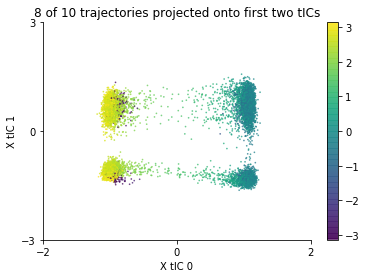

79999 89999
_______________________________________________________


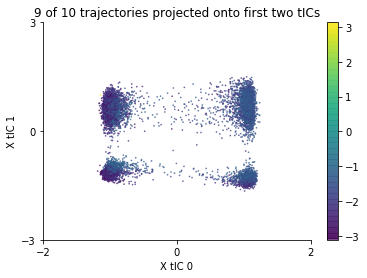

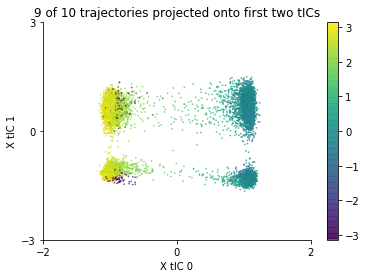

89999 99999
_______________________________________________________


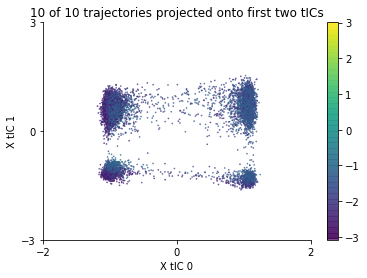

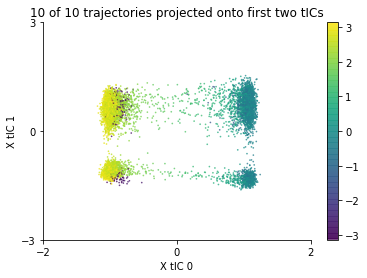

In [94]:
obj_x = obj_x.T
starting_idx = 0
ending_idx = 0
for i in range(len(X)):
    ending_idx += len(X[i])
#     print(starting_idx, ending_idx, ending_idx - starting_idx)
    x_coors = obj_x[0][starting_idx:ending_idx]
    y_coors = obj_x[1][starting_idx:ending_idx]
    di_angles = Y_di[i]
    print (starting_idx, ending_idx)
    print ('_______________________________________________________')
    for j in range(2):
#         print (len(di_angles.T[j]), len(x_coors))
        assert len(di_angles.T[j])==len(x_coors), 'not the same number of points for the angles as the plotting traj points:'



        ax = plt.subplot(111)
        plt.scatter(x_coors, y_coors, s=0.5, alpha=0.7, c=di_angles.T[j], cmap=cm.viridis)
        plt.xlabel('X tIC 0')
        plt.ylabel('X tIC 1')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.xticks([-2,0,2])
        plt.yticks([-3,0,3])
        label = str(i+1)+' of '+str(len(X)) +' trajectories projected onto first two tICs'
        plt.title(label)
        
        plt.colorbar()
        plt.show()
    starting_idx = ending_idx
